# Project: Exploratory Data Analysis on Seattle Airbnb Data
### Project Due on Friday 10th Dec 2021, 11:59 pm EST

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

**To get the dataset click [here](https://georgiancollege-my.sharepoint.com/:f:/g/personal/katie_tiwari_georgiancollege_ca/Eh6hG8jQX_FBvU_pk5R5wZwB_xn5gS2eBE1vWQ_DmaH1kQ?e=evqomn)**

#### Inspiration for questions
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

#### **Note:** Don't discuss the results, limitations, conclusion, reasons as comment in the code cell. Use separate markdown cells instead. If you are not familier with markdown, refer this [link here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook). Only add code related comments as comment in the code cell. Also Make sure to add comments in the code.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. 

- Create atleast three complex and meaningful questions(refer inspiration questions to get an idea), then address those questions in the rest of the analysis. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.
- **Include the 3 research questions here**



In [91]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings.


In [92]:
#1.At which month it is best to maximize the revenue and good time for maintenence?
#2.Which is the Highest revenue of listings in the neighbourhood?
#3.What are the features that affects the price?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and privde the reasoning for every decision taken.

In [93]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings. 

# Listing DataSet

In [94]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

print("Packages loaded")

Packages loaded


In [95]:
listing = pd.read_csv('listings.csv')

In [96]:
listing.shape

(3818, 92)

In [97]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [98]:
#Checking Null
listing.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [99]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [100]:
listing.count()

id                                  3818
listing_url                         3818
scrape_id                           3818
last_scraped                        3818
name                                3818
                                    ... 
cancellation_policy                 3818
require_guest_profile_picture       3818
require_guest_phone_verification    3818
calculated_host_listings_count      3818
reviews_per_month                   3191
Length: 92, dtype: int64

In [101]:
listing = listing.dropna(subset=['host_is_superhost','neighbourhood_group_cleansed', 'property_type', 'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'instant_bookable', 'cancellation_policy']) 
listing.count()

id                                  3793
listing_url                         3793
scrape_id                           3793
last_scraped                        3793
name                                3793
                                    ... 
cancellation_policy                 3793
require_guest_profile_picture       3793
require_guest_phone_verification    3793
calculated_host_listings_count      3793
reviews_per_month                   3173
Length: 92, dtype: int64

In [102]:
listing.at[listing['bathrooms'].isnull(), 'bathrooms'] = 0
listing.at[listing['bedrooms'].isnull(), 'bedrooms'] = 0
listing.at[listing['beds'].isnull(), 'beds'] = 0 
listing.at[listing['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
listing.at[listing['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
listing.at[listing['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
listing.at[listing['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
listing.at[listing['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
listing.at[listing['review_scores_location'].isnull(), 'review_scores_location'] = 0
listing.at[listing['review_scores_value'].isnull(), 'review_scores_value'] = 0

In [103]:
listing['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3793, dtype: object

Price has a $ dollar sign lets remove it so we include that variable inside our analysis

In [104]:
listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")

<ipython-input-104-1fa923c02ad9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  listing['price'] = listing['price'].str.replace("[$, ]", "").astype("float")


In [105]:
listing.rename(columns={'id':'listing_id'}, inplace=True)

In [106]:
print("Sucessfully Completed Data Cleaning for Listing DataSet")

Sucessfully Completed Data Cleaning for Listing DataSet


# Reviews DataSet

In [107]:
reviews = pd.read_csv('reviews.csv')

In [108]:
reviews = reviews[['id','listing_id','date']]

In [109]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [110]:
reviews.head()

,id,listing_id,date
0,38917982,7202016,2015-07-19
1,39087409,7202016,2015-07-20
2,39820030,7202016,2015-07-26
3,40813543,7202016,2015-08-02
4,41986501,7202016,2015-08-10


In [111]:
#Check if number of reviews in reviews.csv is equal to SUM(number_of_reviews) 
listing_review = reviews[['listing_id','id']].groupby(['listing_id']).count()
listing_review.columns = ['Number of reviews']

In [112]:
listing_review = pd.merge(listing, listing_review, on='listing_id')

In [113]:
listing_review.at[listing_review['Number of reviews'].isnull(), 'Number of reviews'] = 0
listing_review[ listing_review['Number of reviews'] != listing_review['number_of_reviews']]

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Number of reviews


Result shows empty result, means that the number of reviews in reviews.csv matches the sum of number_of_reviews.

In [114]:
#Calculating revenue for each listing
bookings = pd.merge(reviews, listing, on='listing_id')
bookings['estimated_revenue'] = bookings['price'] * bookings['minimum_nights']

In [115]:
revenue = bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()

In [116]:
listing = pd.merge(listing, revenue, on='listing_id', how='left')
listing.at[listing['estimated_revenue'].isnull(), 'estimated_revenue'] = 0

In [117]:
listing['estimated_revenue'].head()

0    17595.0
1    12900.0
2    78000.0
3        0.0
4    17100.0
Name: estimated_revenue, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

### Research Question 1 (At which month it is best to rent a place to maximize the revenue)

In [118]:
# Use this, and more code cells, to explore your data. Don't forget to add markdown cells to document your observations and findings.
#Top 5 Highest Revenue Listing 
listing[['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
2598,3594885,8,1000,4,1.0,1.0,1200000.0
2093,5056580,100,31,2,1.0,1.0,306900.0
1491,4009508,38,20,5,2.0,2.0,266000.0
1528,1954452,71,14,2,1.0,1.0,218680.0
1510,3971934,48,20,3,1.0,1.0,171840.0


In above data, The top earners are hosts have minimum nights of 1000

In [119]:
#We can see that 1000 minimum nights are not standard when compared to other data so lets filter with a minimum_nights of less than equal to 16
listing.loc[listing['minimum_nights']<=16, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
1528,1954452,71,14,2,1.0,1.0,218680.0
1622,2825852,68,14,3,1.0,1.0,132328.0
2870,4009295,44,14,3,1.0,1.0,104104.0
1070,3385421,31,6,4,2.0,2.0,103602.0
2,3308979,20,4,11,5.0,7.0,78000.0


In the Filtered data, The Top earns are hosts have minimum nights of 14

In [120]:
#Lets check the co-relation with filtered data and non-filtered data
listing[['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.000000,0.872436
estimated_revenue,0.872436,1.000000


We have a postive co-realation of 0.872 between minimum_nights and estimated_revenue(Non_Filtered Data)

In [121]:
listing.loc[listing['minimum_nights']<=16,['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.00000,0.25521
estimated_revenue,0.25521,1.00000


When comparing both the filtered and non-filtered data we can see filtered data is less co-realation of 0.255

1000 minimum nights has influenced the correlation for revenue. But after removing that host, minimum nights and estimated revenue are less co-related.

<BarContainer object of 12 artists>

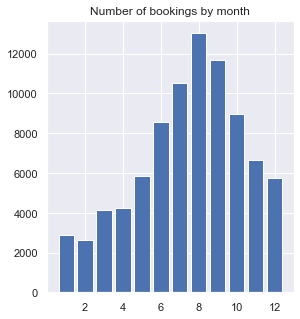

In [122]:
#Booking by Month
plt.figure(figsize=(15, 5))

book_month = reviews[['date']].groupby(reviews["date"].dt.month).count()
book_month.rename(columns={'date':'Number of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("Number of bookings by month")
plt.bar(book_month.index, book_month['Number of bookings'])

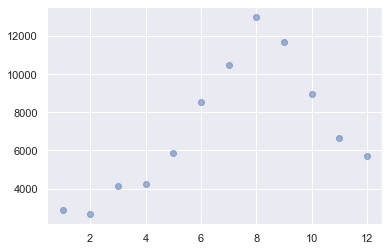

In [123]:
#Scatter Plot
plt.scatter(book_month.index, book_month['Number of bookings'], alpha=0.5)
plt.show()

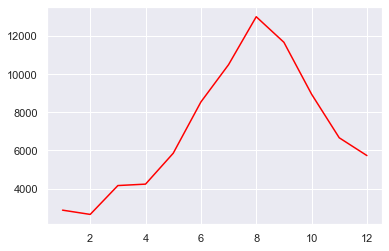

In [124]:
#Line Chart
plt.plot(book_month['Number of bookings'], linestyle = 'solid', color='red')
plt.show()

According to the following analysis, we can say that August is the best month and next comes the September and The best time of Maintenence is at the  start of the every year.

### Research Question 2  (Which is the Highest revenue of listings in the neighbourhood?)

                              estimated_revenue
neighbourhood_group_cleansed                   
Downtown                            7293.854127
Capitol Hill                        7057.745552
Beacon Hill                         6358.324786
Ballard                             6078.726087
Queen Anne                          6038.752542
Central Area                        4636.371274
Other neighborhoods                 4426.490518
Cascade                             4075.134831
Seward Park                         4063.500000
Rainier Valley                      3822.598726
Delridge                            3641.189873
Magnolia                            3587.819672
West Seattle                        3367.717822
Northgate                           2892.802632
Lake City                           2476.432836
Interbay                            2105.727273
University District                 1558.557377


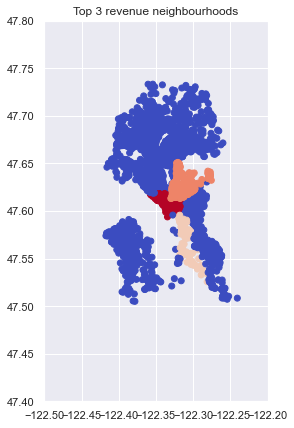

In [125]:
neighbourhood_revenue = listing[['neighbourhood_group_cleansed','estimated_revenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(neighbourhood_revenue)

listing_plot = listing[['neighbourhood_group_cleansed','longitude','latitude','estimated_revenue']]
listing_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in neighbourhood_revenue[0:3].index:
  listing_plot.at[listing_plot['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2

plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.4, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.5, -122.2])
plt.scatter(listing_plot['longitude'],
            listing_plot['latitude'],
            cmap="coolwarm",
            c=listing_plot['color']
           )

_ = plt.plot()

Downtown, Capitol Hill and Beacon Hill are the highest revenue neighbourhood. 

### Research Question 3  (What are the features that affects the price?)

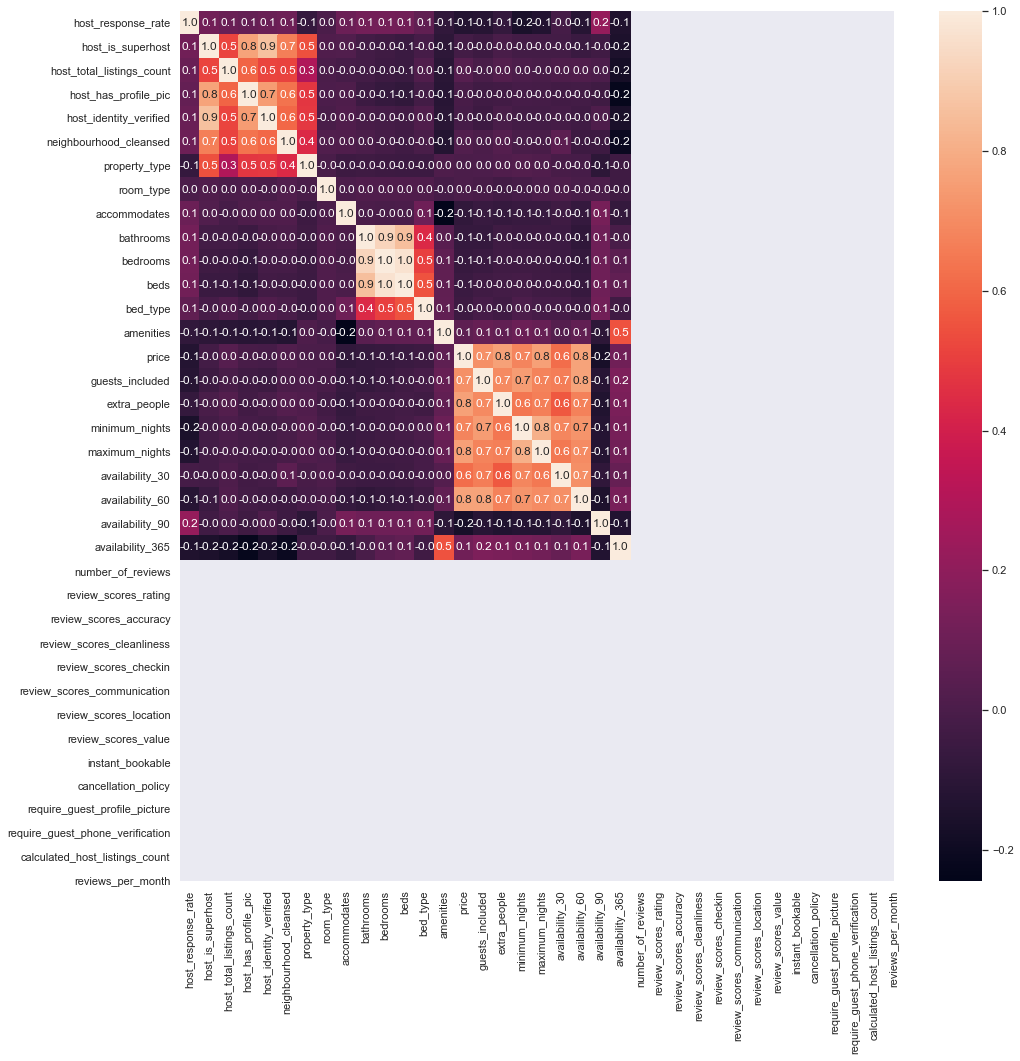

In [126]:
corr = listing.loc[(listing.price > 0)][col].dropna().corr()
plt.figure(figsize = (16,16))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, fmt = '.1f', xticklabels=col, yticklabels=col)
plt.show();

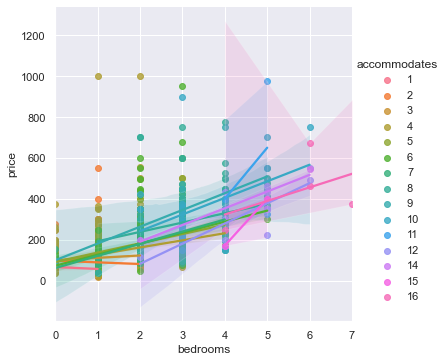

In [127]:
#Number of Bedrooms
sns.lmplot(x='bedrooms', y="price", data=listing, hue='accommodates')

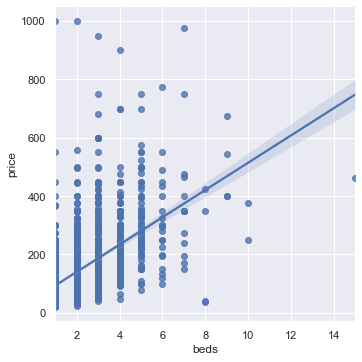

In [128]:
#Number of Beds
sns.lmplot(x='beds', y="price", data=listing)

According to the co-relation chart, The price affects the number of beds and bedrooms with a co-relation of 0.9

<a id='conclusions'></a>
## Conclusions

> At the end, summarize your findings and the results that have been performed. 
- The Conclusion should reflect on the steps taken during the data exploration, summarize the main findings in relation to the questions provided at the beginning of the analysis accurately.
- The conclusion points out where additional research can be done or where additional information could be useful and **should have at least 1 limitation explained clearly.**
- The analysis should not state or imply that one change causes another based solely on a correlation. You can refer to this video on [Correlation does not mean Causation](https://youtu.be/VMUQSMFGBDo)


So in the following analysis, I would like to conclude that the best time to maximize the revenue is in the month of august by renting the airbnb near the neighbourhood of Downtown, Capitol Hill and Beacon Hill and can increase the profits by attaching more bedrooms and beds.

# Limitations
The mininum_nights value is 1000 which will take more than a year to achieve. Such values can distort reality and the analysis we are trying to do.